In [26]:
import numpy as np 
import os 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 

# C2 Results analysis

In [120]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C2_square/2019-07-02_08-42-55/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C2_square/2019-07-02_08-42-55/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [121]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [122]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [123]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [124]:
accuracies_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
Model Accuracy,0.611714,0.726544,0.755207,0.732419,0.652395,0.670465,0.561421,0.723162,0.674292,0.630408,0.760281,0.753249,0.630675,0.597383,0.700997
Ratio of Positive Samples,0.449973,0.683194,0.401994,0.633612,0.472761,0.396386,0.474453,0.628538,0.422557,0.449083,0.396208,0.398878,0.527061,0.474275,0.398433


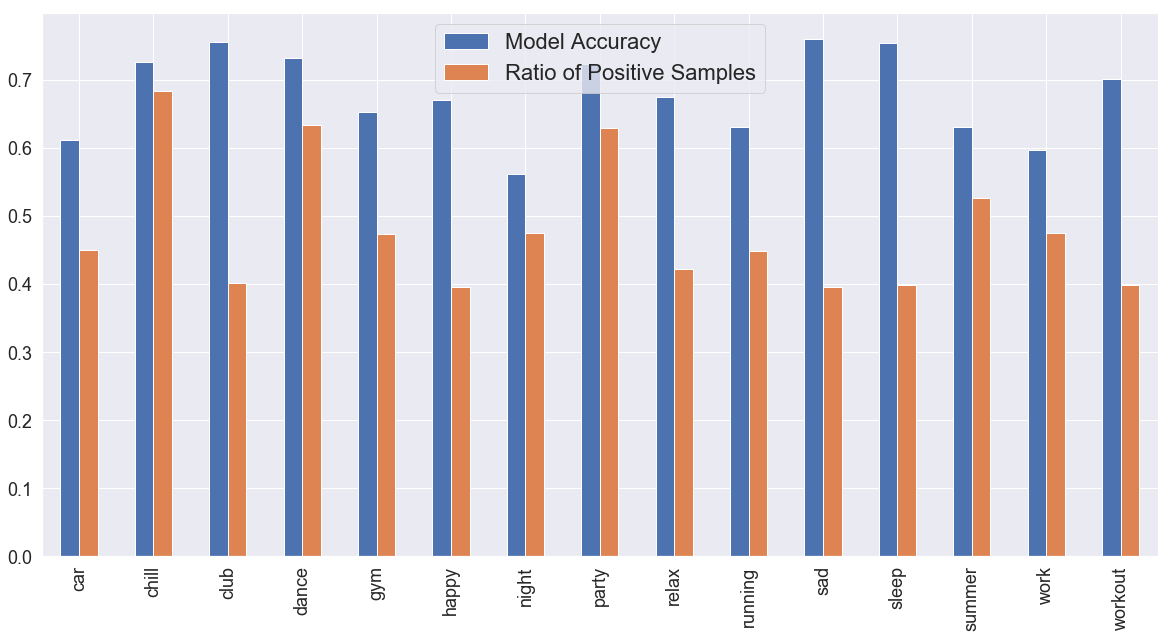

In [125]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [129]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
True positives ratio (TP/sum of positive samples),0.651236,0.935635,0.709699,0.849817,0.615138,0.494947,0.645216,0.876221,0.630293,0.563132,0.656931,0.660567,0.732984,0.571884,0.564567
Ratio of Positive Samples,0.449973,0.683194,0.401994,0.633612,0.472761,0.396386,0.474453,0.628538,0.422557,0.449083,0.396208,0.398878,0.527061,0.474275,0.398433


In [130]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

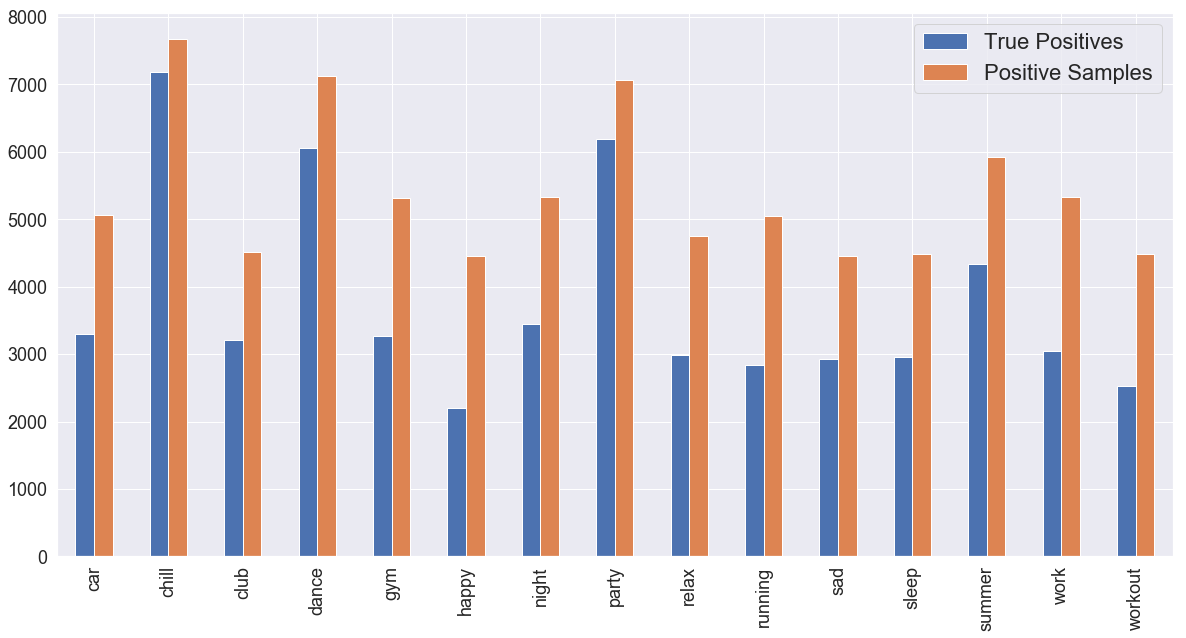

In [131]:
true_positives_df.T.plot.bar(figsize=(20,10),fontsize = 18)

In [132]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

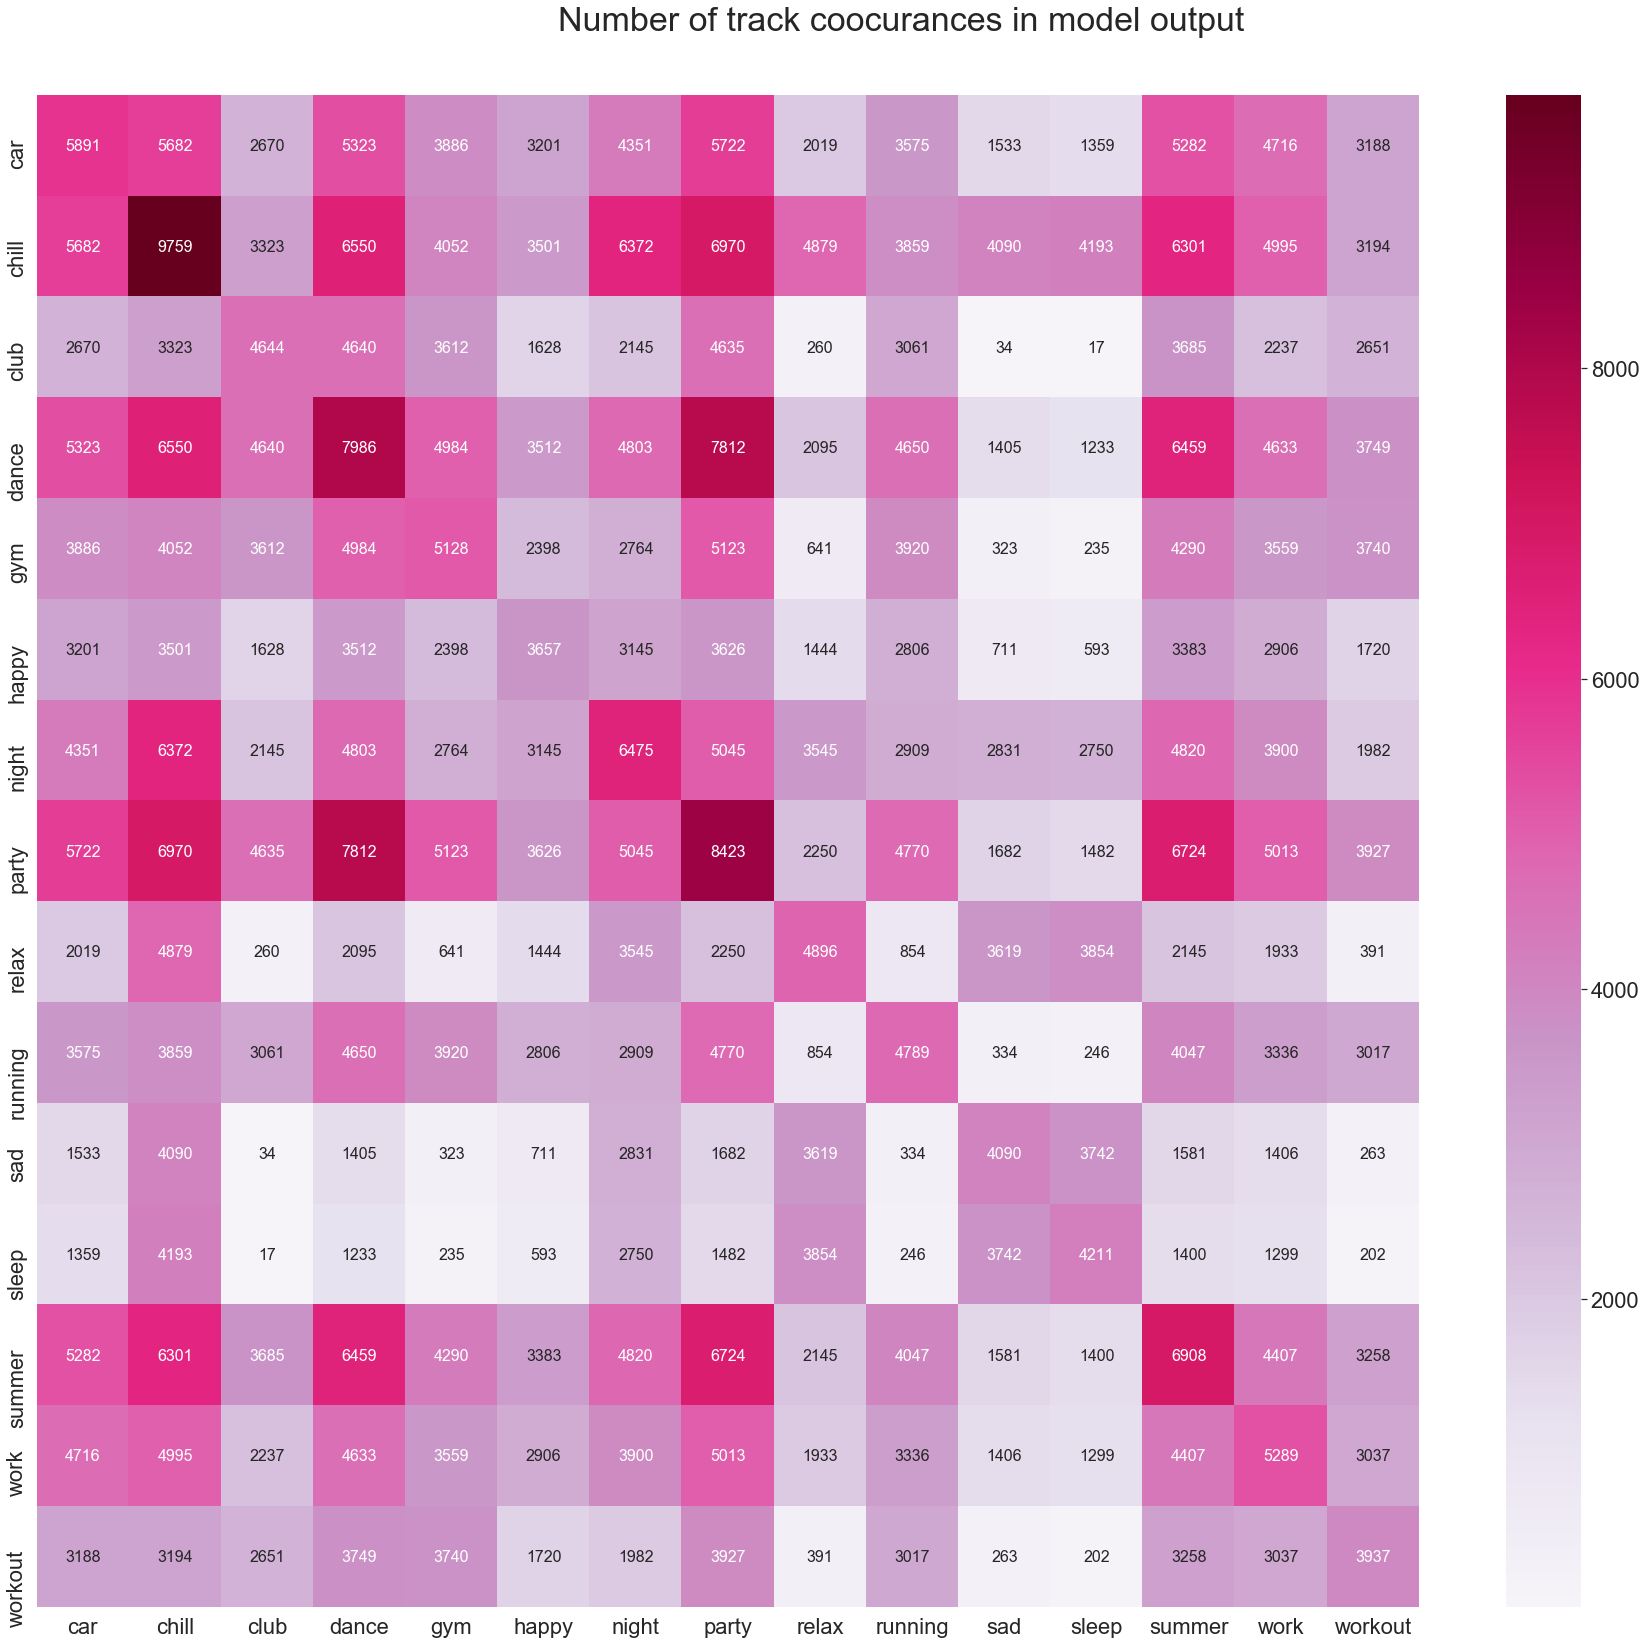

In [133]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [134]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
0,0.348764,0.064365,0.290301,0.150183,0.384862,0.505053,0.354784,0.123779,0.369707,0.436868,0.343069,0.339433,0.267016,0.428116,0.435433


In [115]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

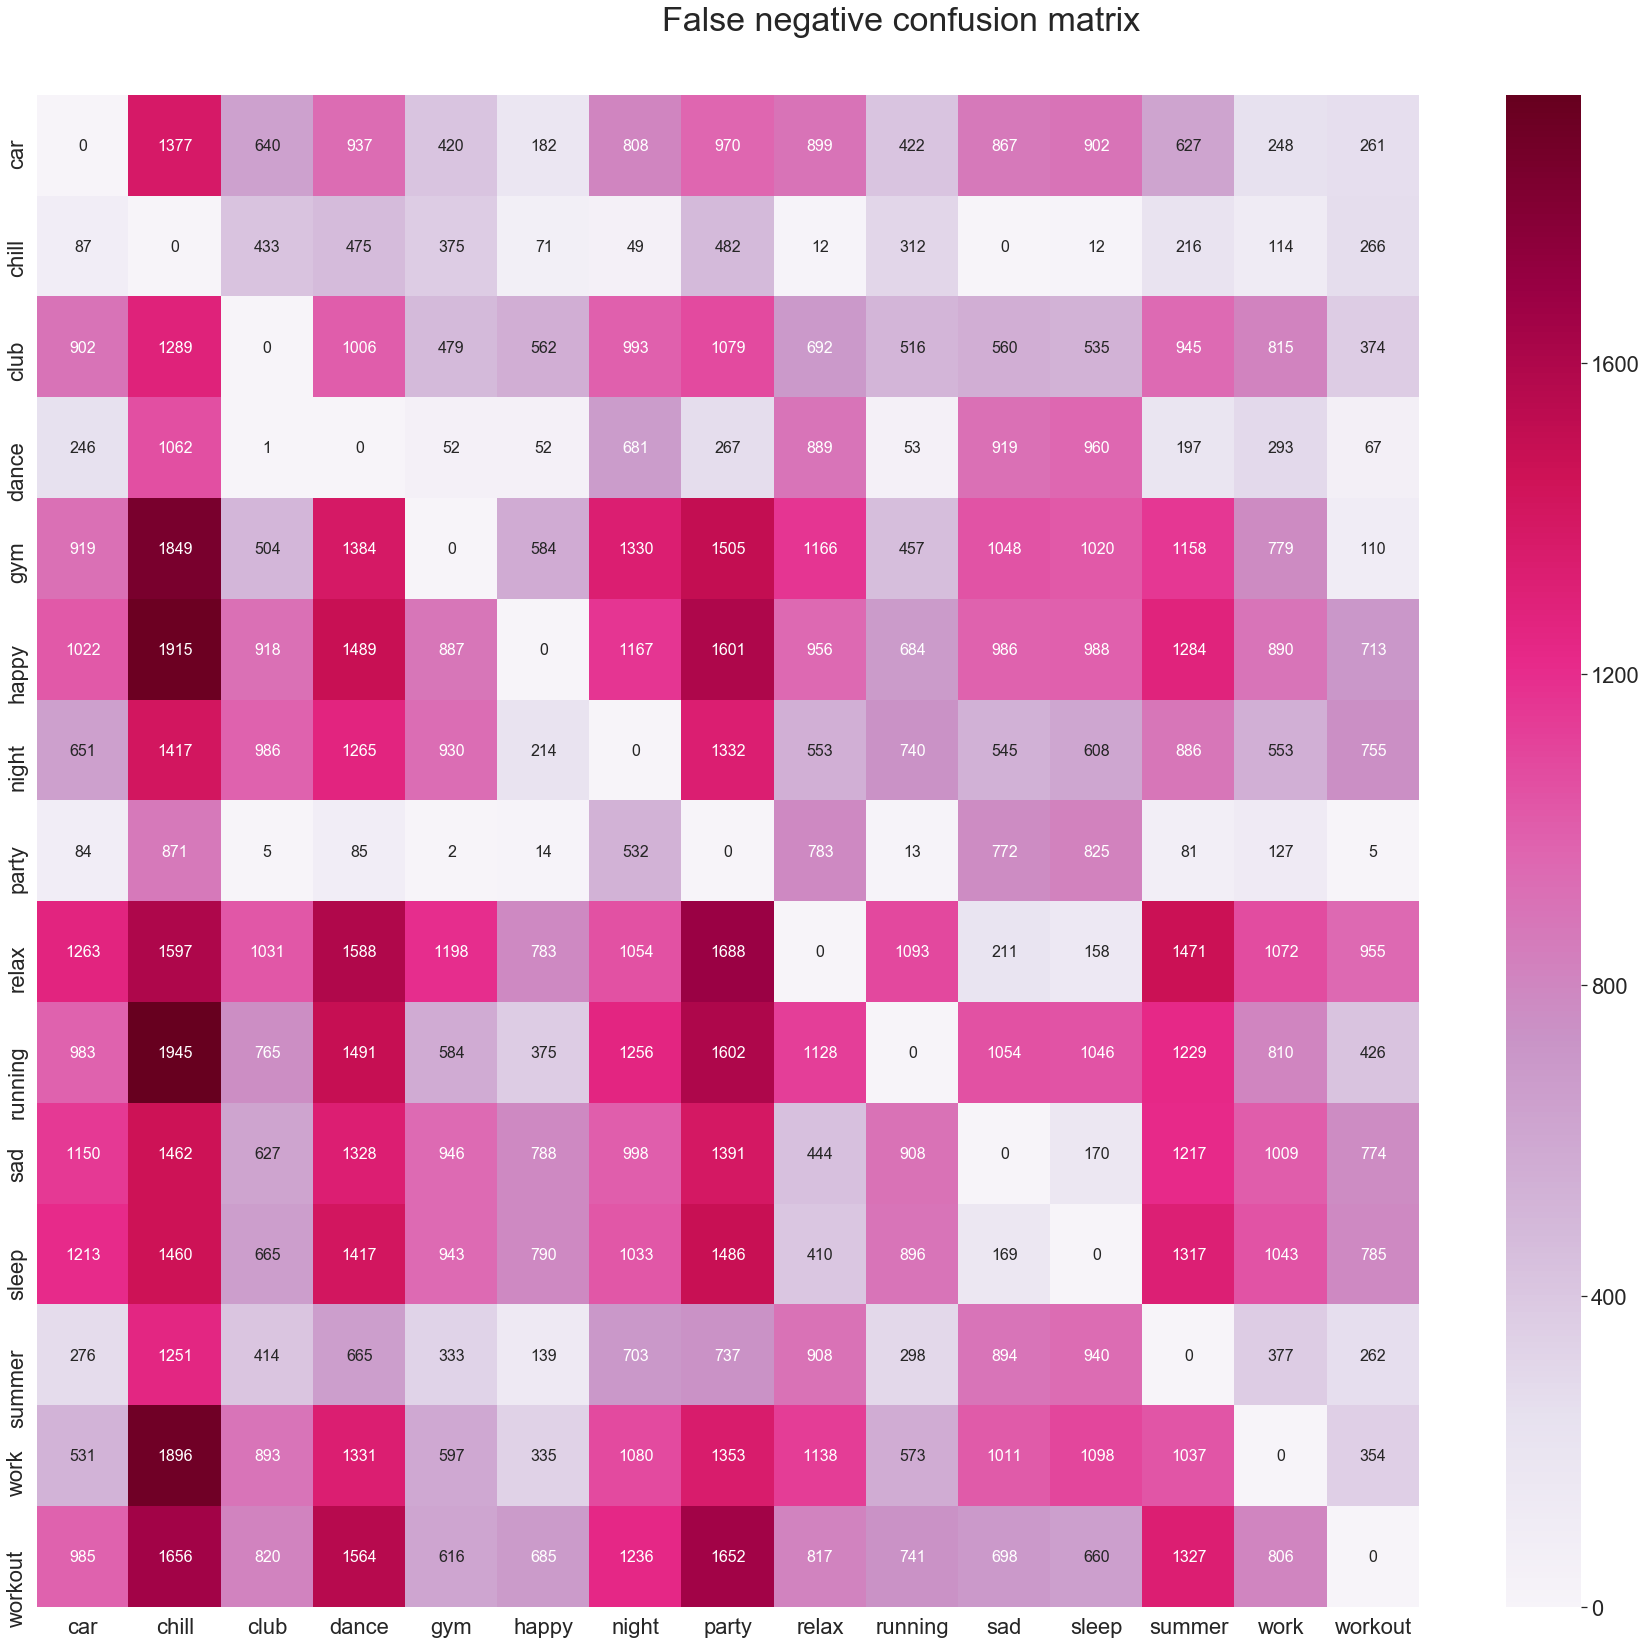

In [118]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

## Some observations
In our test set we have ~12k samples, ~7k of them are labelled as chill. Our model's output contain ~9k chill predictions.

In [138]:
test_classes

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## C4 results

In [202]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [170]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [171]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [172]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [173]:
accuracies_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
Model Accuracy,0.613228,0.729749,0.767492,0.737048,0.659694,0.690226,0.562044,0.730728,0.675450,0.633612,0.775503,0.759124,0.632722,0.595336,0.706783
Ratio of Positive Samples,0.449973,0.683194,0.401994,0.633612,0.472761,0.396386,0.474453,0.628538,0.422557,0.449083,0.396208,0.398878,0.527061,0.474275,0.398433


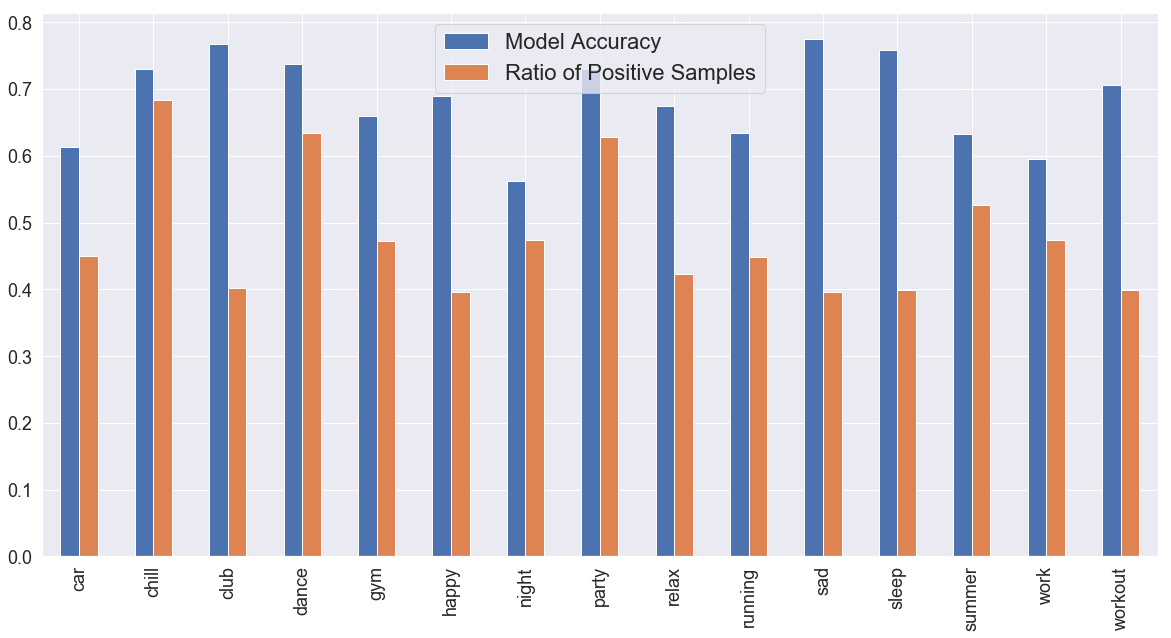

In [174]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [175]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
True positives ratio (TP/sum of positive samples),0.548170,0.917915,0.640390,0.819753,0.652796,0.522344,0.416698,0.865317,0.586476,0.640436,0.698045,0.684445,0.732815,0.576389,0.567471
Ratio of Positive Samples,0.449973,0.683194,0.401994,0.633612,0.472761,0.396386,0.474453,0.628538,0.422557,0.449083,0.396208,0.398878,0.527061,0.474275,0.398433


In [176]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples')

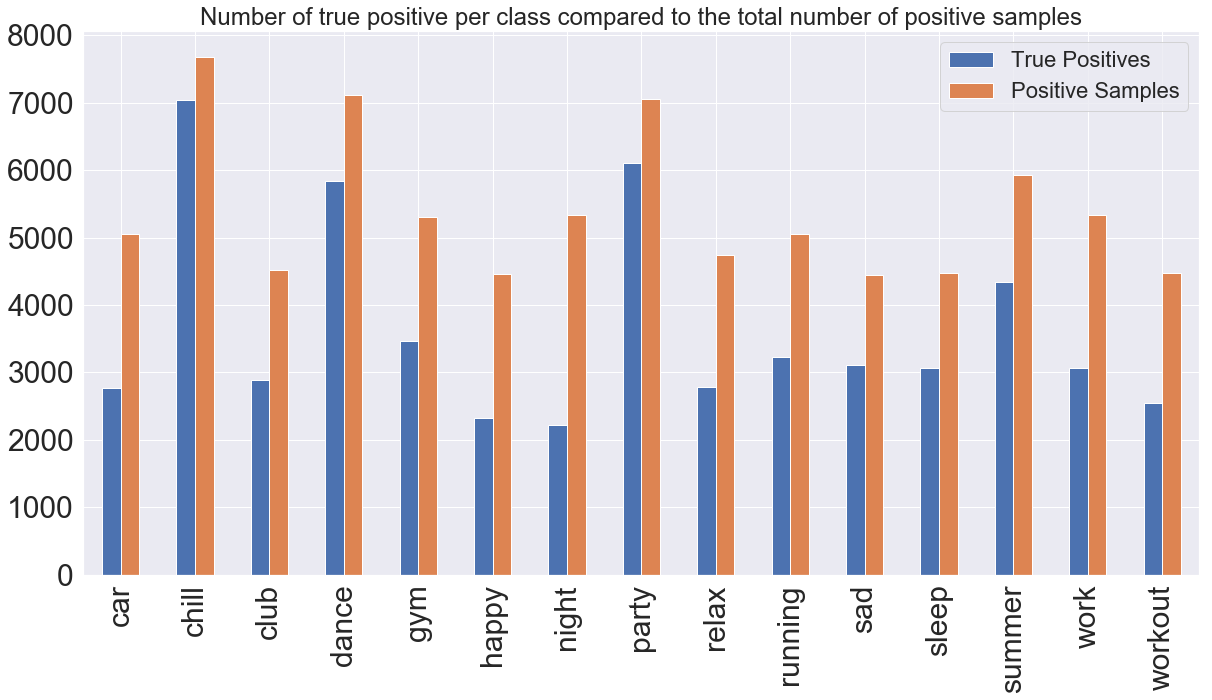

In [189]:
true_positives_df.T.plot.bar(figsize=(20,10),fontsize = 30)
plt.title("Number of true positive per class compared to the total number of positive samples")

In [178]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

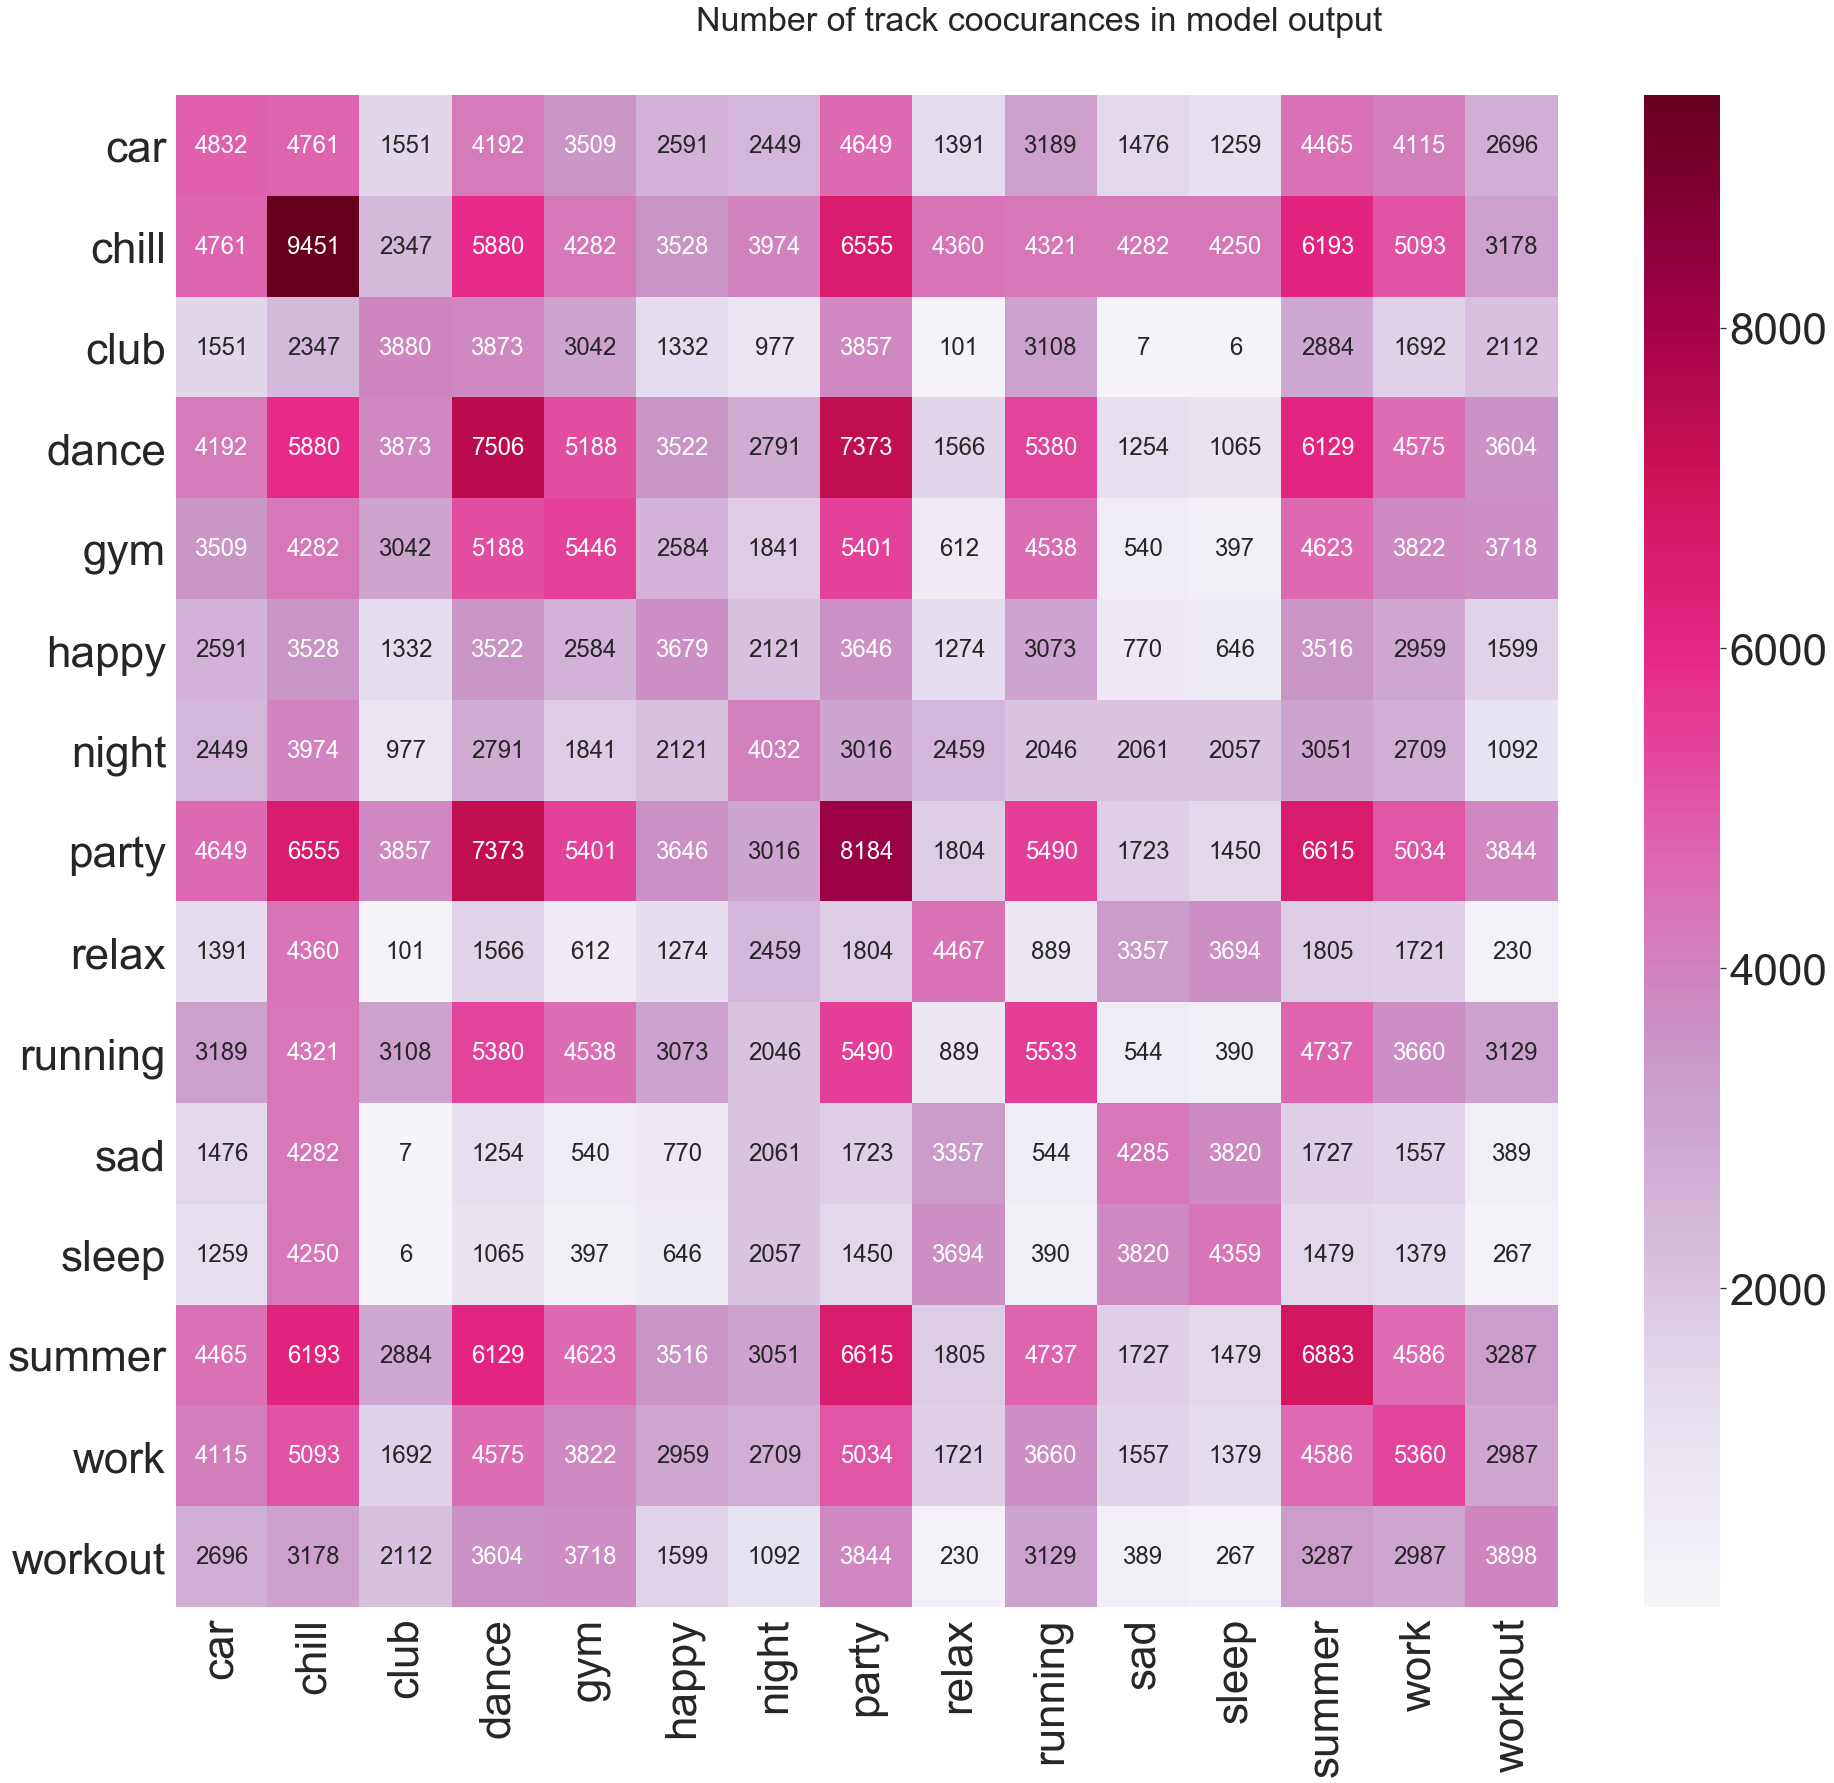

In [194]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

In [180]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
0,0.45183,0.082085,0.35961,0.180247,0.347204,0.477656,0.583302,0.134683,0.413524,0.359564,0.301955,0.315555,0.267185,0.423611,0.432529


In [181]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

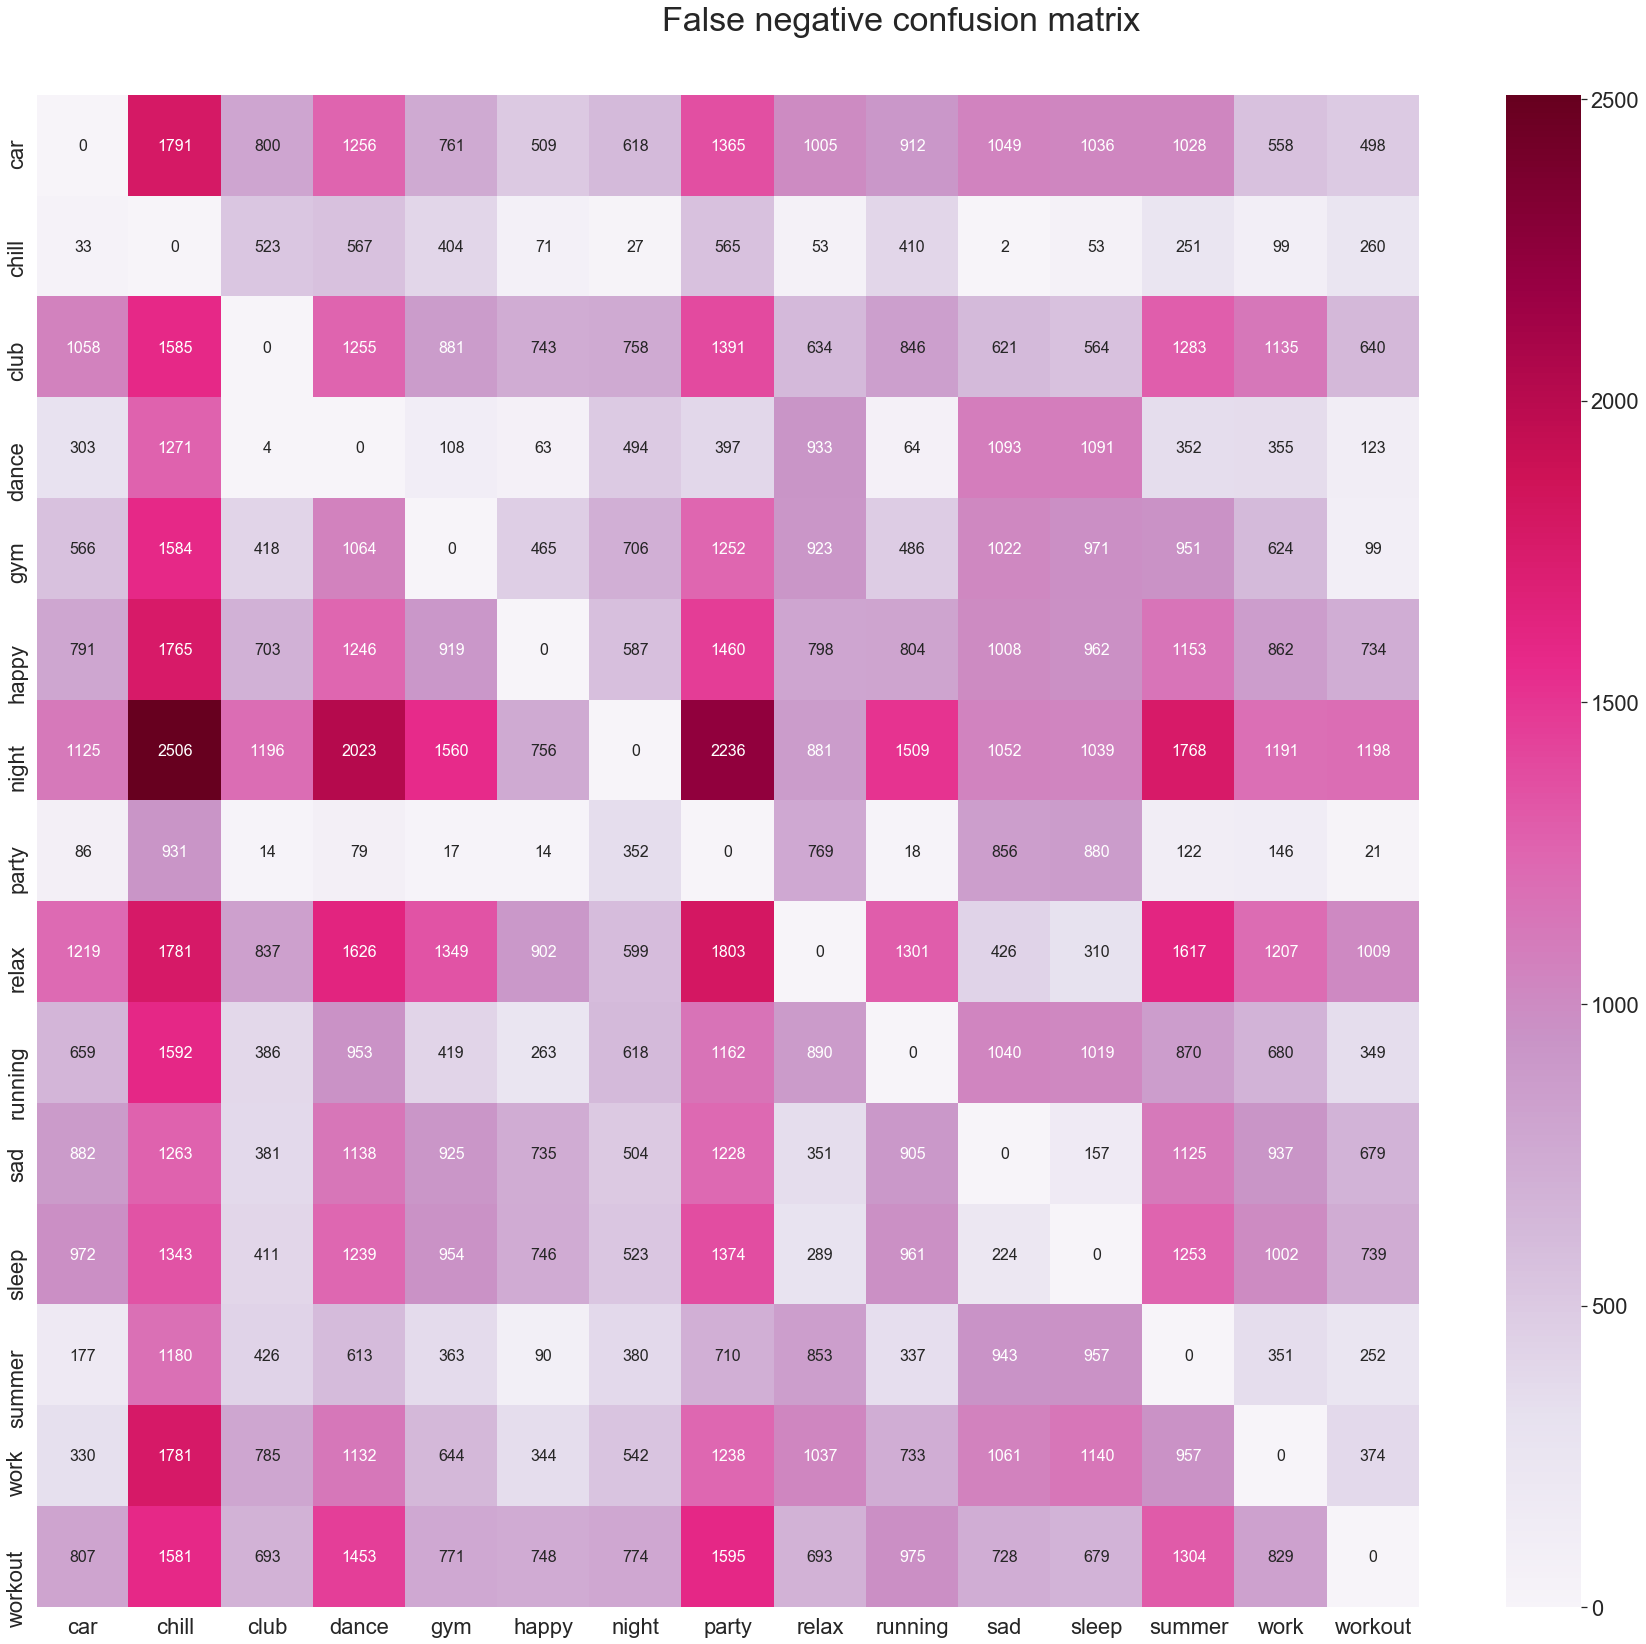

In [182]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [186]:
true_positives_ratio_perclass.mean()

0.6579640498985764

In [203]:
# Getting coocuarances
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_classes_df.columns)
for column in test_classes_df.columns:
    coocurrances[column] = test_classes_df[test_classes_df[column] == 1].sum()
coocurrances = coocurrances.T

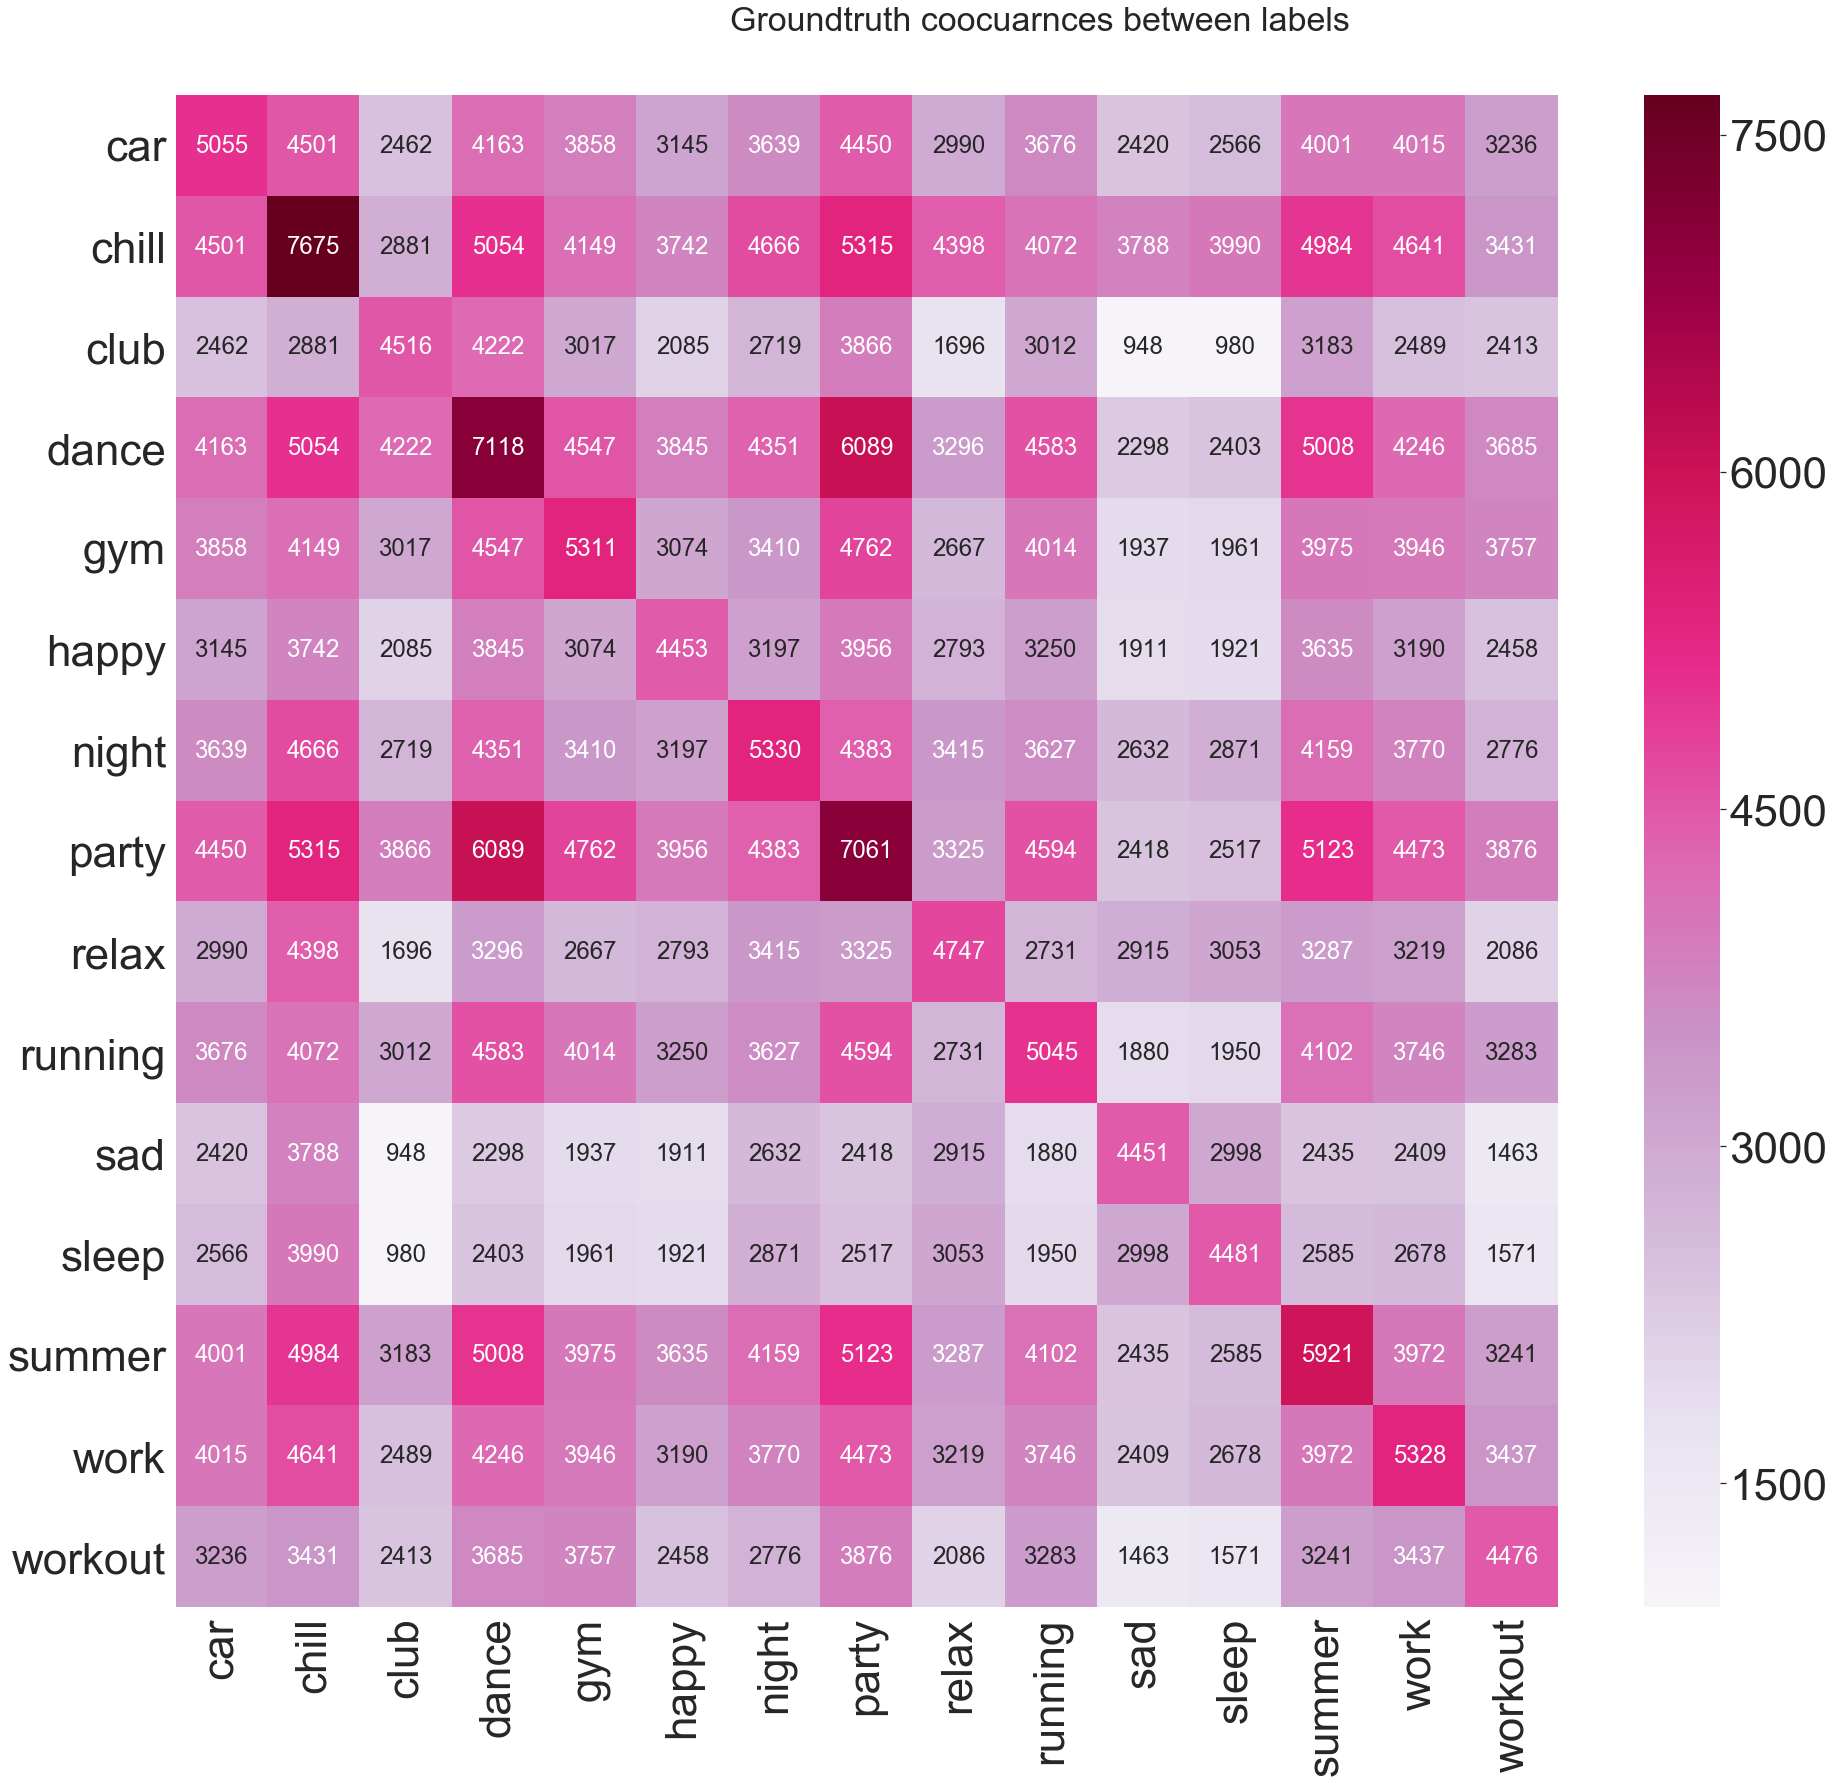

In [207]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Groundtruth coocuarnces between labels', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

## Old test set performance

In [211]:
# General Imports
import os
import numpy as np
import pandas as pd
from time import strftime, localtime
import matplotlib.pyplot as plt

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, TimeDistributed, Flatten, GRU, Dropout, Dense, BatchNormalization
#import dzr_ml_tf.data_pipeline as dp
#from dzr_ml_tf.label_processing import tf_multilabel_binarize
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

# Machine Learning preprocessing and evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, \
    hamming_loss
from sklearn.model_selection import train_test_split
from dzr_ml_tf.device import limit_memory_usage

SOURCE_PATH = "/srv/workspace/research/context_classification_cnn/"
SPECTROGRAMS_PATH = "/srv/workspace/research/balanceddata/mel_specs/"
OUTPUT_PATH = "/srv/workspace/research/balanceddata/experiments_results"


def load_spectrogram_tf(sample, identifier_key="song_id",
                        path="/my_data/MelSpectograms_top20/", device="/cpu:0",
                        features_key="features"):
    """
        wrap load_spectrogram into a tensorflow function.
    """
    with tf.device(device):
        input_args = [sample[identifier_key], tf.constant(path)]
        res = tf.py_func(load_spectrogram,
                         input_args,
                         (tf.float32, tf.bool),
                         stateful=False),
        spectrogram, error = res[0]

        res = dict(list(sample.items()) + [(features_key, spectrogram), ("error", error)])
        return res


def load_spectrogram(*args):
    """
        loads spectrogram with error tracking.
        args : song ID, path to dataset
        return:
            Features: numpy ndarray, computed features (if no error occured, otherwise: 0)
            Error: boolean, False if no error, True if an error was raised during features computation.
    """
    # TODO: edit path
    path = SPECTROGRAMS_PATH
    song_id, dummy_path = args
    try:
        # tf.logging.info(f"Load spectrogram for {song_id}")
        spect = np.load(os.path.join(path, str(song_id) + '.npz'))['arr_0']
        if (spect.shape != (1, 646, 96)):
            #print("\n Error while computing features for" +  str(song_id) + '\n')
            return np.float32(0.0), True
            # spect = spect[:,215:215+646]
        # print(spect.shape)
        return spect, False
    except Exception as err:
        #print("\n Error while computing features for " + str(song_id) + '\n')
        return np.float32(0.0), True


def get_model():
    # Define model architecture

    # C1_freq
    """
    model = Sequential(
        [
            InputLayer(input_shape=INPUT_SHAPE, name="input_layer"),

            BatchNormalization(),

            Conv2D(activation="relu", filters=32, kernel_size=[32, 1], name="conv_1", padding="same"),
            MaxPooling2D(name="max_pool_1", padding="valid", pool_size=[1, 80]),

            Flatten(),
            Dense(200, activation='sigmoid', name="dense_1"),
            Dropout(name="dropout_1", rate=0.5),
            Dense(15, activation='sigmoid', name="dense_2"),
        ]
    )
    """

    # C1_time
    """
    model = Sequential(
        [
            InputLayer(input_shape=INPUT_SHAPE, name="input_layer"),

            BatchNormalization(),

            Conv2D(activation="relu", filters=32, kernel_size=[1, 60], name="conv_1", padding="same"),
            MaxPooling2D(name="max_pool_1", padding="valid", pool_size=[96, 1]),

            Flatten(),
            Dense(200, activation='sigmoid', name="dense_1"),
            Dropout(name="dropout_1", rate=0.5),
            Dense(15, activation='sigmoid', name="dense_2"),
        ]
    )
    """

    # C4_model

    model = Sequential(
        [
            InputLayer(input_shape=INPUT_SHAPE, name="input_layer"),

            BatchNormalization(),

            Conv2D(activation="relu", filters=32, kernel_size=[3, 3], name="conv_1", padding="same"),
            MaxPooling2D(name="max_pool_1", padding="valid", pool_size=[2, 2]),

            Conv2D(activation="relu", filters=64, kernel_size=[3, 3], name="conv_2", padding="same", use_bias=True),
            MaxPooling2D(name="max_pool_2", padding="valid", pool_size=[2, 2]),

            Conv2D(activation="relu", filters=128, kernel_size=[3, 3], name="conv_3", padding="same", use_bias=True),
            MaxPooling2D(name="max_pool_3", padding="valid", pool_size=[2, 2]),

            Conv2D(activation="relu", filters=256, kernel_size=[3, 3], name="conv_4", padding="same", use_bias=True),
            MaxPooling2D(name="max_pool_4", padding="valid", pool_size=[2, 2]),

            # TimeDistributed(layer=Flatten(name="Flatten"), name="TD_Flatten"),
            # GRU(activation="tanh", dropout=0.1, name="gru_1", recurrent_activation="hard_sigmoid", recurrent_dropout=0.1,
            #        return_sequences=False, trainable=True, units=512, use_bias=True),

            # Dropout(name="dropout_1", rate=0.3),
            # Dense(activation="sigmoid", name="dense_1", trainable=True, units=20),

            Flatten(),
            Dense(256, activation='sigmoid', name="dense_1"),
            Dropout(name="dropout_1", rate=0.3),
            Dense(15, activation='sigmoid', name="dense_2"),
        ]
    )


    # C2_model
    """
    model = Sequential(
        [
            InputLayer(input_shape=INPUT_SHAPE, name="input_layer"),

            BatchNormalization(),

            Conv2D(activation="relu", filters=32, kernel_size=[3, 3], name="conv_1", padding="same"),
            MaxPooling2D(name="max_pool_1", padding="valid", pool_size=[2, 2]),

            Conv2D(activation="relu", filters=64, kernel_size=[3, 3], name="conv_2", padding="same", use_bias=True),
            MaxPooling2D(name="max_pool_2", padding="valid", pool_size=[2, 2]),

            Flatten(),
            Dense(256, activation='sigmoid', name="dense_1"),
            Dropout(name="dropout_1", rate=0.3),
            Dense(15, activation='sigmoid', name="dense_2"),
        ]
    )
    """
    return model


def compile_model(model, loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']):
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)


def load_old_test_set_raw(LOADING_PATH=os.path.join(SOURCE_PATH, "GroundTruth/"),
                      SPECTROGRAM_PATH="/home/karim/Documents/MelSpectograms_top20/"):
    # Loading testset groundtruth
    test_ground_truth = pd.read_csv(os.path.join(LOADING_PATH, "old_test_ground_truth[unbalanced].csv"))
    all_ground_truth = pd.read_pickle(os.path.join(LOADING_PATH, "old_ground_truth_hot_vector[unblanced].pkl"))
    all_ground_truth.drop(['playlists_count','train', 'shower', 'park', 'morning', 'training'], axis=1, inplace=True);
    all_ground_truth = all_ground_truth[all_ground_truth.song_id.isin(test_ground_truth.song_id)]
    test_ground_truth = test_ground_truth[test_ground_truth.song_id.isin(all_ground_truth.song_id)]
    all_ground_truth = all_ground_truth.set_index('song_id')
    all_ground_truth = all_ground_truth.loc[test_ground_truth.song_id]
    test_classes = all_ground_truth.values
    test_classes = test_classes.astype(int)

    spectrograms = np.zeros([len(test_ground_truth), 646, 96])
    songs_ID = np.zeros([len(test_ground_truth), 1])
    for idx, filename in enumerate(list(test_ground_truth.song_id)):
        try:
            spect = np.load(os.path.join(SPECTROGRAM_PATH, str(filename) + '.npz'))['feat']
        except:
            continue
        if (spect.shape == (1, 1292, 96)):
            spect = spect [:,323 : 323+ 646,:]
            spectrograms[idx] = spect
            songs_ID[idx] = filename
    spectrograms = np.expand_dims(spectrograms, axis=3)
    return spectrograms, test_classes


def evaluate_model(model, spectrograms, test_classes, saving_path, evaluation_file_path):
    """
    Evaluates a given model using accuracy, area under curve and hamming loss
    :param model: model to be evaluated
    :param spectrograms: the test set spectrograms as an np.array
    :param test_classes: the ground truth labels
    :return: accuracy, auc_roc, hamming_error
    """
    test_pred_prob = model.predict(spectrograms)
    test_pred = np.round(test_pred_prob)
    # Accuracy
    accuracy = 100 * accuracy_score(test_classes, test_pred)
    print("Exact match accuracy is: " + str(accuracy) + "%")
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    auc_roc = roc_auc_score(test_classes, test_pred_prob)
    print("Macro Area Under the Curve (AUC) is: " + str(auc_roc))
    auc_roc_micro = roc_auc_score(test_classes, test_pred_prob, average = "micro")
    print("Micro Area Under the Curve (AUC) is: " + str(auc_roc_micro))
    auc_roc_weighted = roc_auc_score(test_classes, test_pred_prob, average = "weighted")
    print("Weighted Area Under the Curve (AUC) is: " + str(auc_roc_weighted))
    # Hamming loss is the fraction of labels that are incorrectly predicted.
    hamming_error = hamming_loss(test_classes, test_pred)
    print("Hamming Loss (ratio of incorrect tags) is: " + str(hamming_error))
    with open(evaluation_file_path, "w") as f:
        f.write("Exact match accuracy is: " + str(accuracy) + "%\n" + "Area Under the Curve (AUC) is: " + str(auc_roc)
                + "\nMicro AUC is:" + str(auc_roc_micro) + "\nWeighted AUC is:" + str(auc_roc_weighted)
                +  "\nHamming Loss (ratio of incorrect tags) is: " + str(hamming_error))
    print("saving prediction to disk")
    np.savetxt(os.path.join(saving_path, 'predictions.out'), test_pred_prob, delimiter=',')
    np.savetxt(os.path.join(saving_path, 'test_ground_truth_classes.txt'), test_classes, delimiter=',')
    return accuracy, auc_roc, hamming_error


ImportError: No module named 'sklearn'

In [ ]:
optimization = tf.keras.optimizers.Adadelta(lr = 0.01)
model = get_model()
compile_model(model,optimizer=optimization)
model.load_weights(os.path.join(exp_dir, experiment_name, "best_eval.h5"))
old_specs, old_test_classes = load_old_test_set_raw()
print("\nEvaluating on old testset:")
accuracy, auc_roc, hamming_error = evaluate_model(model, old_specs, old_test_classes,saving_path= os.path.join(exp_dir, experiment_name),
                                                 evaluation_file_path=os.path.join(exp_dir, experiment_name, "old_evaluation_results.txt"))